In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import copy

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [5]:
size = 200

In [6]:
method = "normal"

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size]

In [8]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [9]:
color_codes = [color_schemes.get_main_color(i)[-4] for i in colorschemes]

In [10]:
images_overlapping = []
z_sums = []
gaussians = []
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5][0][0] = 1 
        static_gaussian_rep[0][5][1][1] = 1
    else:
        static_gaussian_rep[0][5][0][0] = i * 3 
        static_gaussian_rep[0][5][1][1] = i * 3
    static_gaussian_rep[1][4][0] = +2.5
    static_gaussian_rep[1][4][1] = +2.5
    static_gaussian_rep[2][4][0] = -2.5
    static_gaussian_rep[2][4][1] = -2.5
    static_gaussian_rep[3][4][0] = +2.5
    static_gaussian_rep[3][4][1] = -2.5
    static_gaussian_rep[4][4][0] = -2.5
    static_gaussian_rep[4][4][1] = +2.5

    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[1, 0], [0, 1]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[6, 0], [0, 6]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[9, 0], [0, 9]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[12, 0], [0, 12]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25

In [11]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4][0] = +v
    static_gaussian_rep[1][4][1] = +v
    static_gaussian_rep[2][4][0] = -v
    static_gaussian_rep[2][4][1] = -v
    static_gaussian_rep[3][4][0] = +v
    static_gaussian_rep[3][4][1] = -v
    static_gaussian_rep[4][4][0] = -v
    static_gaussian_rep[4][4][1] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2, 2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2, -2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2, -2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2, 2], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [4, 4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-4, -4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [4, -4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-4, 4], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [6, 6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-6, -6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [6, -6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-6, 6], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [8, 8], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-8, -8], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [8, -8], 

In [12]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x, mu_y],[[variance_x, 0],[0, variance_y]], size]

0      1      2      3      4     5           6     7           8
x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

0      1      2      3      4[0]  4[1]    5[0][0]         5[1][1]          6 \n
x_min, x_max, y_min, y_max, [mu_x,mu_y] [[variance_x, 0],[0, variance_y]], size

In [13]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4][0] = -v
    static_gaussian_rep[1][4][1] = -v
    static_gaussian_rep[3][4][0] = -v
    static_gaussian_rep[3][4][1] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, -0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, 0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, -1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, 1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, -1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, 1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, -2.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, 2.0], [[5, 0]

In [14]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4][0] = -4
    static_gaussian_rep[2][4][0] = -v
    static_gaussian_rep[2][4][1] = -v
    static_gaussian_rep[3][4][0] = -v
    static_gaussian_rep[3][4][1] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([copy.deepcopy(i) for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, -0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, 0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, -1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, 1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, -1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, 1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, -2.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, 2.0], [[5

Wie verhalten sich die Contourlinien im Vergleich zu den Gaussians. Wie viele Gaussians sind zu erkennen obwohl es nur 4 gibt. Wie viele Gaussians fehlen/entstehen?

In [15]:
method = "equal_density"

In [16]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x, mu_y],[[variance_x, 0],[0, variance_y]], size]

In [17]:
images_overlapping_equal = []
z_sums_equal = []
gaussians_equal = []
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5][0][0] = 1 
        static_gaussian_rep[0][5][1][1] = 1
    else:
        static_gaussian_rep[0][5][0][0] = i * 3 
        static_gaussian_rep[0][5][1][1] = i * 3
    static_gaussian_rep[1][4][0] = +2.5
    static_gaussian_rep[1][4][1] = +2.5
    static_gaussian_rep[2][4][0] = -2.5
    static_gaussian_rep[2][4][1] = -2.5
    static_gaussian_rep[3][4][0] = +2.5
    static_gaussian_rep[3][4][1] = -2.5
    static_gaussian_rep[4][4][0] = -2.5
    static_gaussian_rep[4][4][1] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([copy.deepcopy(i) for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, [0, 0], [[1, 0], [0, 1]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[6, 0], [0, 6]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[9, 0], [0, 9]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2.5, -2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, 2.5], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[12, 0], [0, 12]], 200], [-10, 10, -10, 10, [2.5, 2.5], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2.5, -2.5], [[25

In [18]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4][0] = +v
    static_gaussian_rep[1][4][1] = +v
    static_gaussian_rep[2][4][0] = -v
    static_gaussian_rep[2][4][1] = -v
    static_gaussian_rep[3][4][0] = +v
    static_gaussian_rep[3][4][1] = -v
    static_gaussian_rep[4][4][0] = -v
    static_gaussian_rep[4][4][1] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([copy.deepcopy(i) for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2, 2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2, -2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [2, -2], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-2, 2], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [4, 4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-4, -4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [4, -4], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-4, 4], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [6, 6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-6, -6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [6, -6], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-6, 6], [[25, 0], [0, 25]], 200]]
[[-10, 10, -10, 10, [0, 0], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [8, 8], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [-8, -8], [[25, 0], [0, 25]], 200], [-10, 10, -10, 10, [8, -8], 

In [19]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x, mu_y],[[variance_x, 0],[0, variance_y]], size]

In [20]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4][0] = -v
    static_gaussian_rep[1][4][1] = -v
    static_gaussian_rep[3][4][0] = -v
    static_gaussian_rep[3][4][1] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([copy.deepcopy(i) for i in static_gaussian_rep])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, -0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, 0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, -1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, 1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, -1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, 1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, -2.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, 2.0], [[5, 0]

In [21]:
static_gaussian_rep = [copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static), copy.deepcopy(gaussian_static)]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4][0] = -4
    static_gaussian_rep[2][4][0] = -v
    static_gaussian_rep[2][4][1] = -v
    static_gaussian_rep[3][4][0] = -v
    static_gaussian_rep[3][4][1] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([copy.deepcopy(i) for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, -0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-0.5, 0.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, -1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.0, 1.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, -1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-1.5, 1.5], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-4, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, -2.0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2.0, 2.0], [[5

['mu_x', 'variance_x', 'mu_y', 'variance_y']


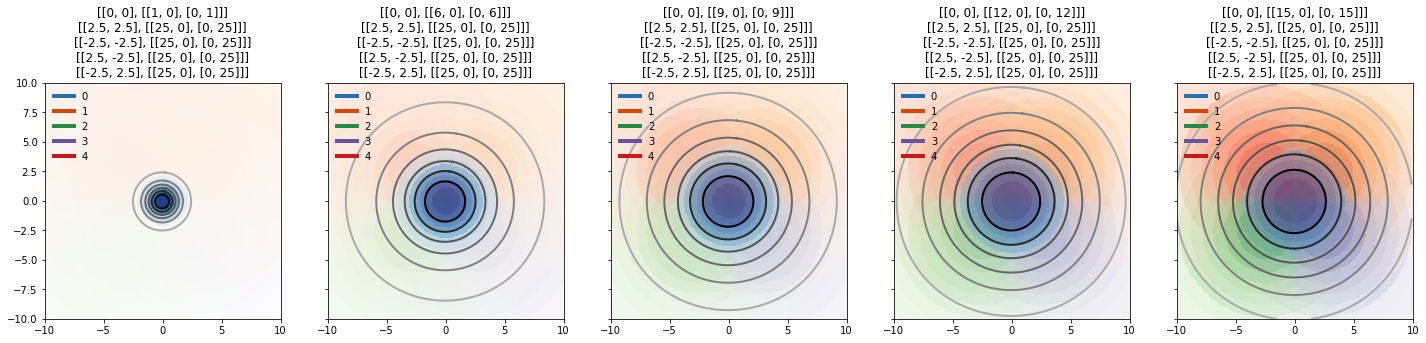

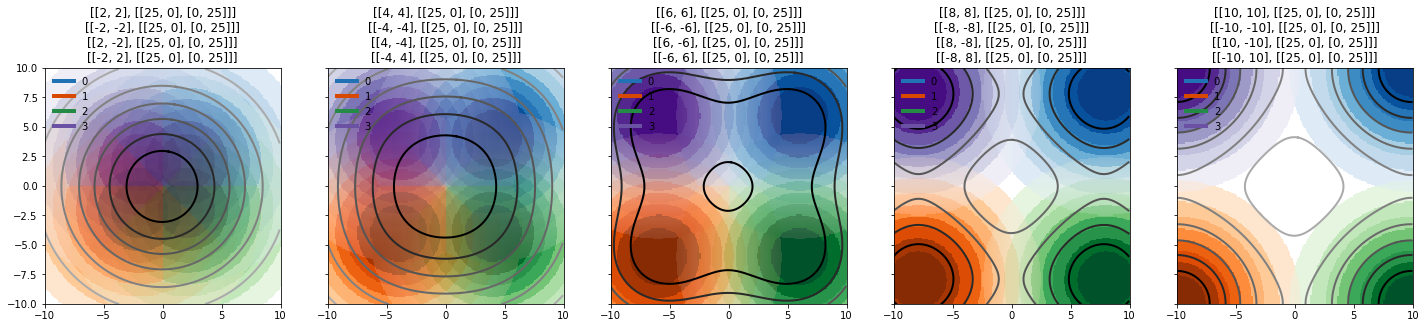

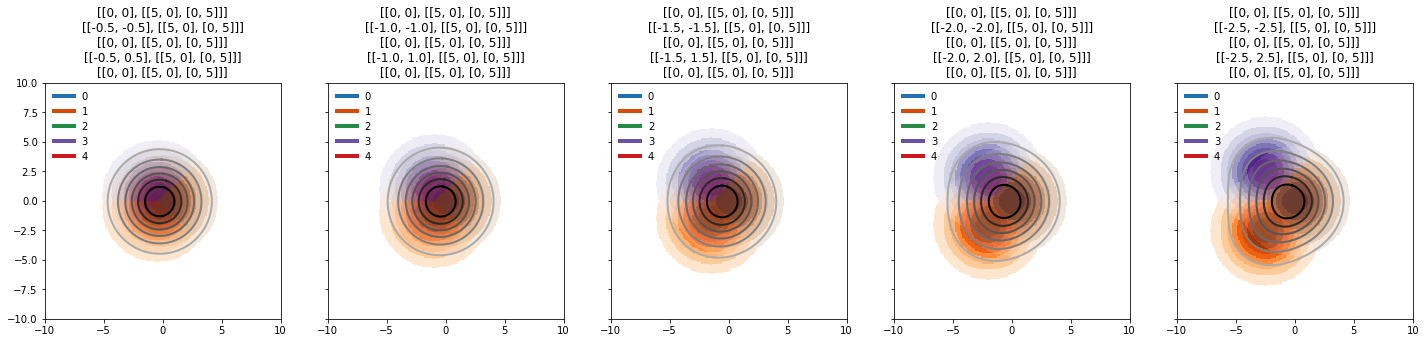

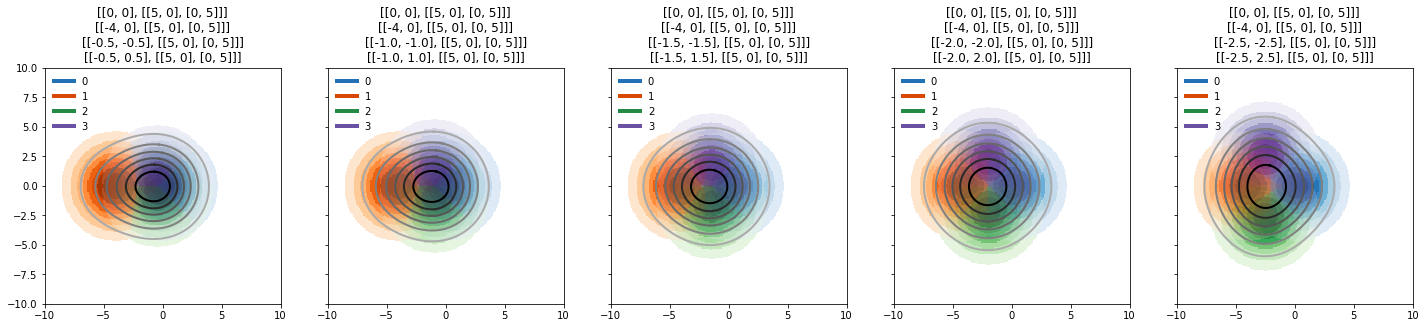

In [22]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_value", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


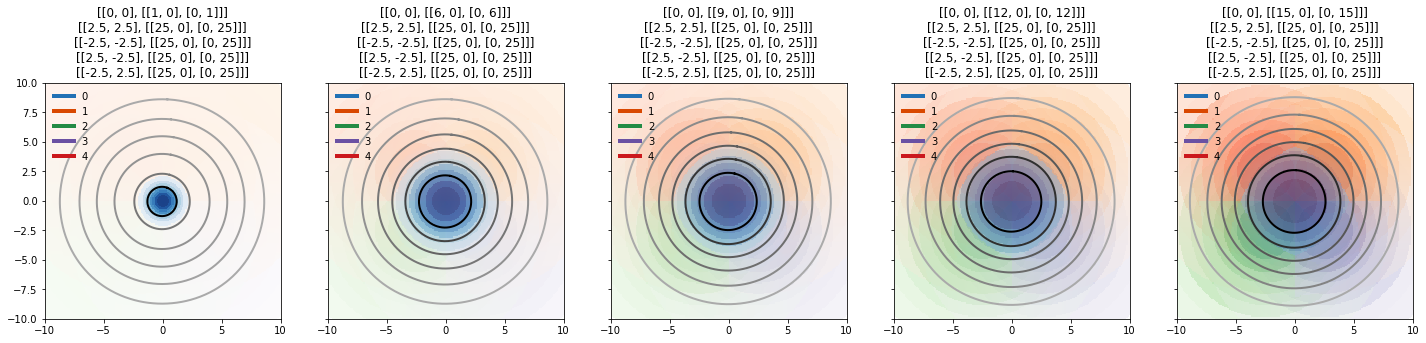

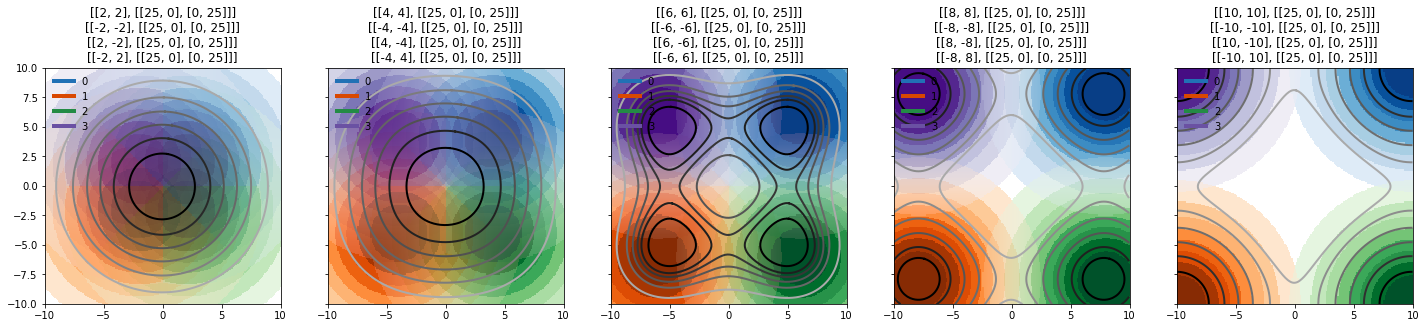

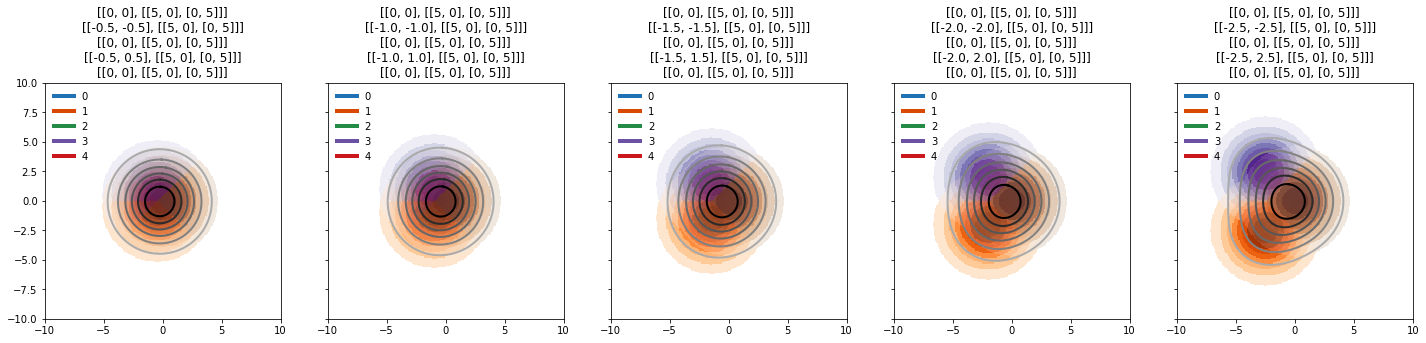

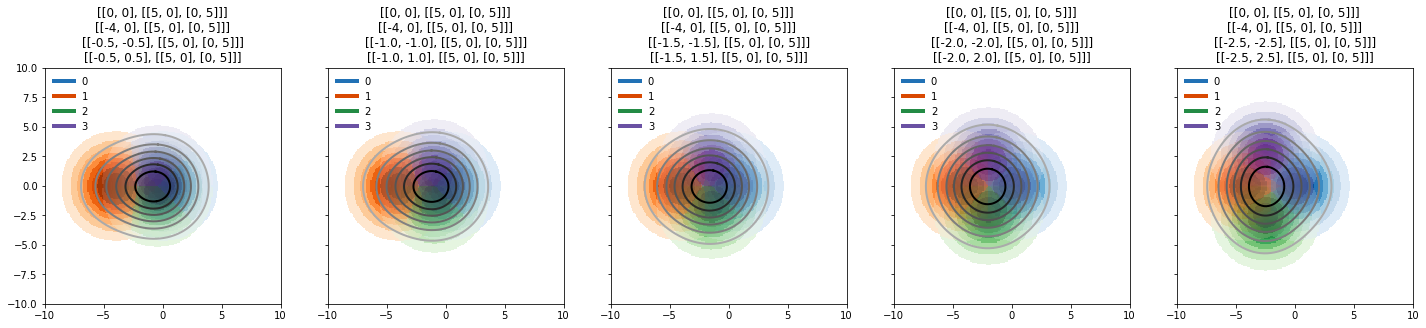

In [23]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_density", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


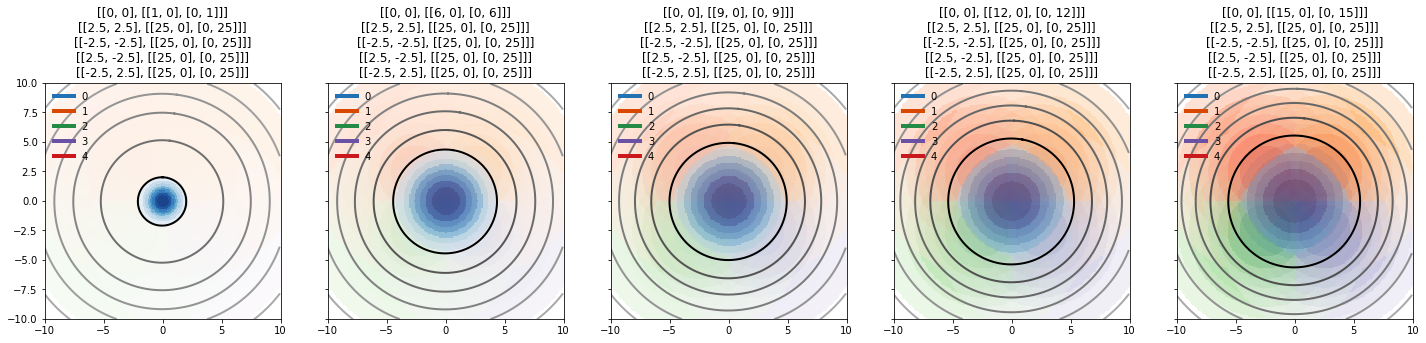

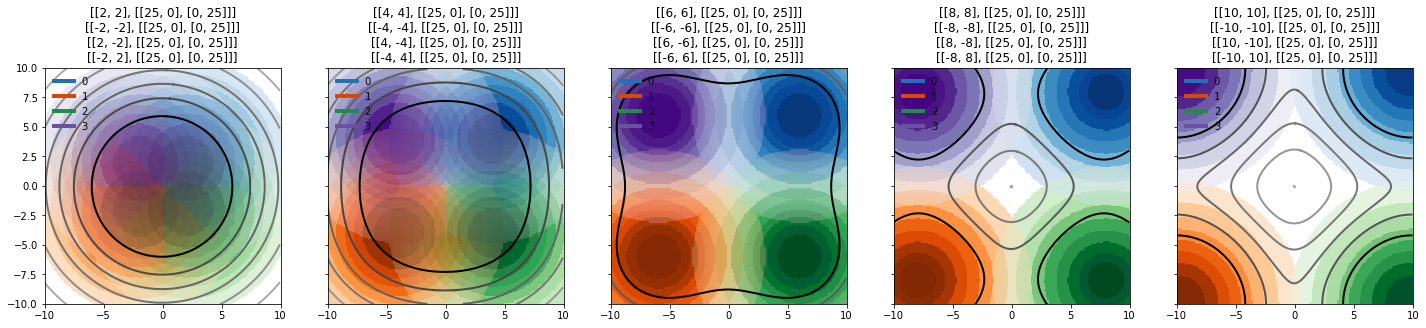

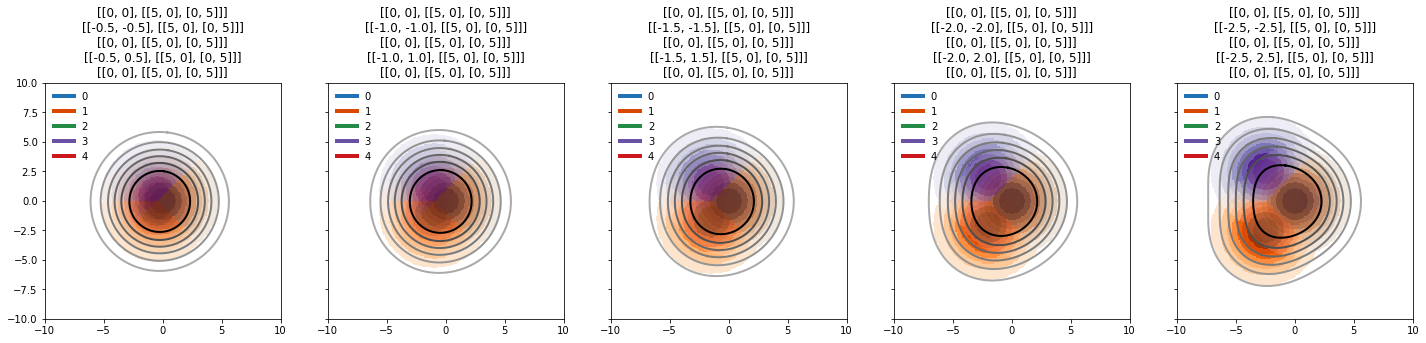

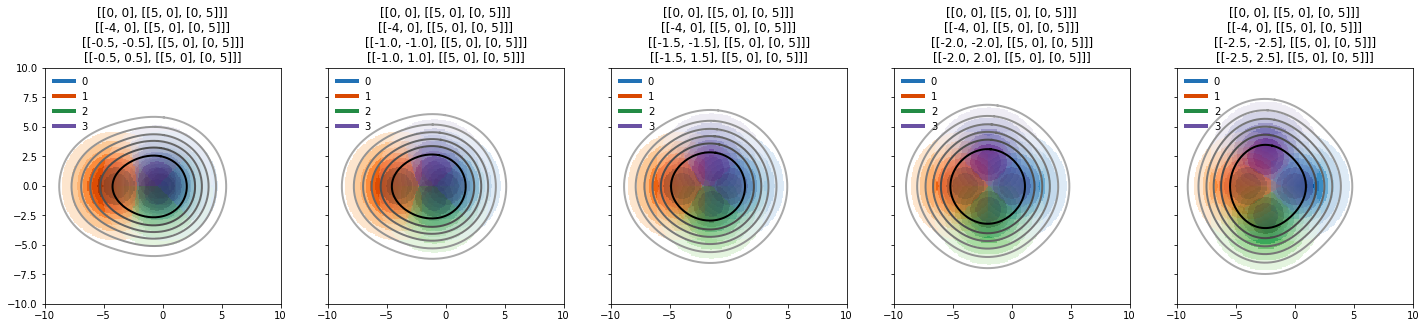

In [24]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="equal_horizontal", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


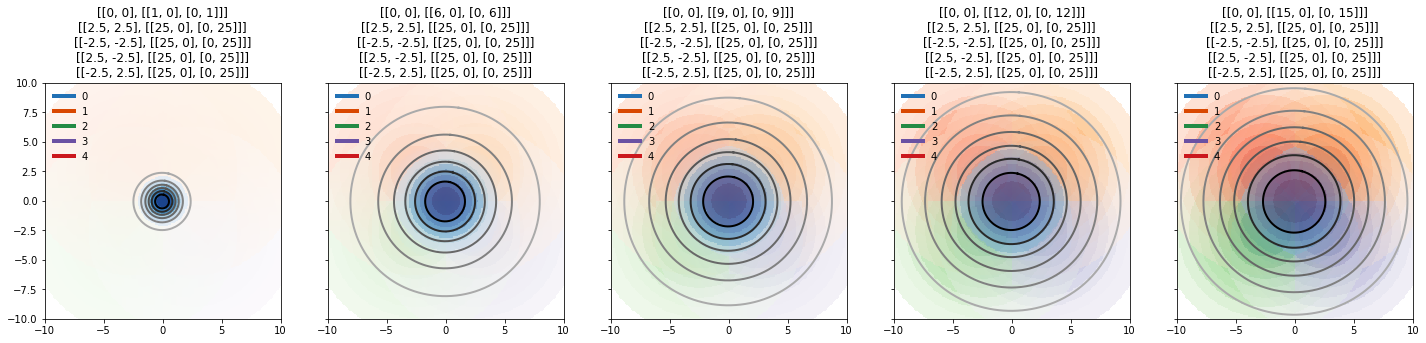

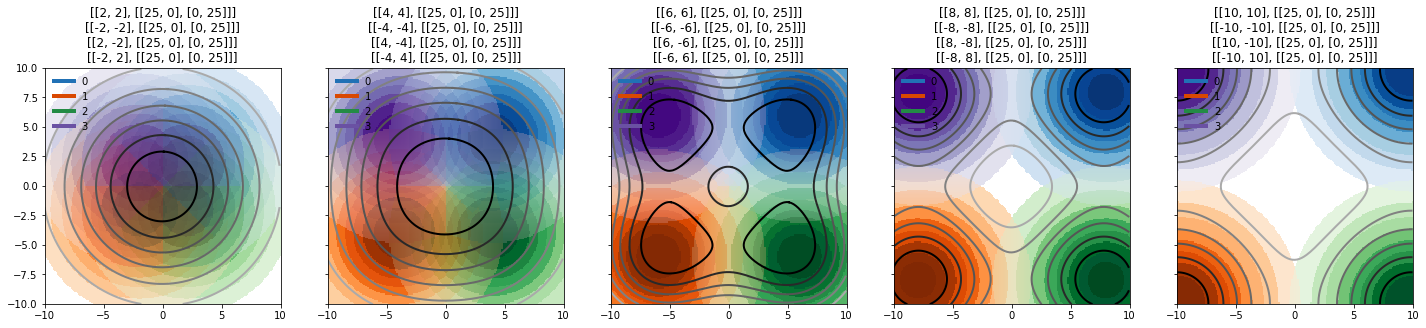

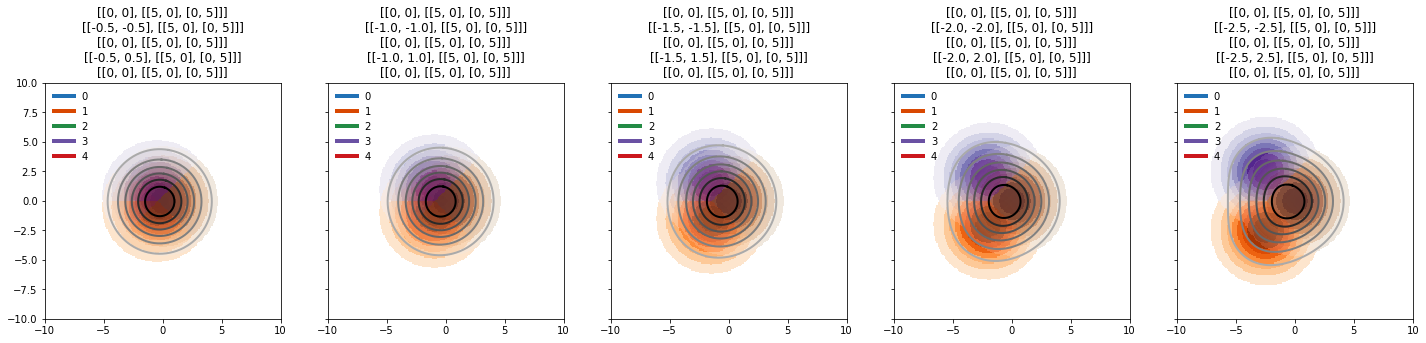

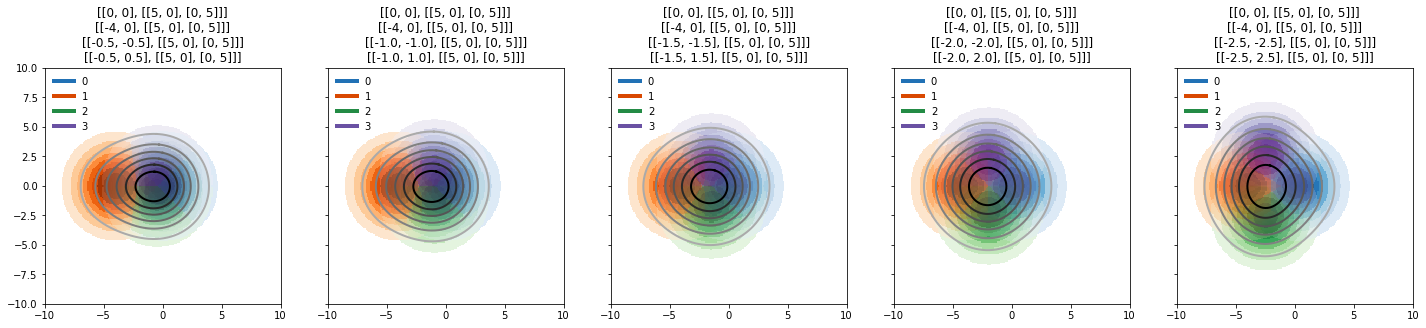

In [25]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="normal", num_of_levels=5)